In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings

In [2]:
warnings.filterwarnings('ignore')

seed = 42
np.random.seed(seed)

In [3]:
df = pd.read_csv("infolimpioavanzadoTarget.csv")

In [4]:
df

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7776,2022-12-23,23.250000,23.540001,23.250000,23.290001,22.699928,4900,ATLO,60.782255,47.081752,...,23.600000,26.223672,27.022465,26.223672,27.022465,-0.798793,0.333333,NaN,NaN,0
7777,2022-12-27,23.350000,23.610001,23.250000,23.350000,22.758406,9200,ATLO,62.022801,47.747952,...,23.610001,30.764722,28.003602,30.764722,28.003602,2.761119,0.625850,NaN,NaN,0
7778,2022-12-28,23.450001,23.570000,23.219999,23.350000,22.758406,15200,ATLO,62.022801,48.713225,...,23.610001,30.764722,29.251039,30.764722,29.251039,1.513683,1.034014,NaN,NaN,0
7779,2022-12-29,23.330000,23.740000,23.330000,23.610001,23.011820,7100,ATLO,67.186408,47.445460,...,23.740000,46.457382,35.995609,46.457382,35.995609,10.461773,0.482993,NaN,NaN,0


In [5]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [6]:
df.shape

(7781, 1285)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Columns: 1285 entries, date to TARGET
dtypes: float64(1280), int64(3), object(2)
memory usage: 76.3+ MB


In [8]:
df.isnull().sum()

date                  0
open                  0
high                  0
low                   0
close                 0
                   ... 
stochastic-kd-15    587
volumenrelativo     215
diff                155
INCREMENTO          155
TARGET                0
Length: 1285, dtype: int64

In [9]:
data_new = df[['open', 'high', 'low', 'close','volume','ticker']]
data_new

,open,high,low,close,volume,ticker
0,17.799999,18.219000,17.500000,17.760000,106600,ASLE
1,17.700001,18.309999,17.620001,17.660000,128700,ASLE
2,17.580000,17.799999,16.910000,16.950001,103100,ASLE
3,16.650000,16.879999,16.139999,16.170000,173600,ASLE
4,16.219999,16.290001,15.630000,15.710000,137800,ASLE
...,...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,4900,ATLO
7777,23.350000,23.610001,23.250000,23.350000,9200,ATLO
7778,23.450001,23.570000,23.219999,23.350000,15200,ATLO
7779,23.330000,23.740000,23.330000,23.610001,7100,ATLO


In [10]:
data_new["tomorrow"]= data_new["close"].shift(-1)
data_new

,open,high,low,close,volume,ticker,tomorrow
0,17.799999,18.219000,17.500000,17.760000,106600,ASLE,17.660000
1,17.700001,18.309999,17.620001,17.660000,128700,ASLE,16.950001
2,17.580000,17.799999,16.910000,16.950001,103100,ASLE,16.170000
3,16.650000,16.879999,16.139999,16.170000,173600,ASLE,15.710000
4,16.219999,16.290001,15.630000,15.710000,137800,ASLE,15.860000
...,...,...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,4900,ATLO,23.350000
7777,23.350000,23.610001,23.250000,23.350000,9200,ATLO,23.350000
7778,23.450001,23.570000,23.219999,23.350000,15200,ATLO,23.610001
7779,23.330000,23.740000,23.330000,23.610001,7100,ATLO,23.610001


In [11]:
data_new["target"] = data_new["tomorrow"] > data_new["close"].astype(float)
data_new

,open,high,low,close,volume,ticker,tomorrow,target
0,17.799999,18.219000,17.500000,17.760000,106600,ASLE,17.660000,False
1,17.700001,18.309999,17.620001,17.660000,128700,ASLE,16.950001,False
2,17.580000,17.799999,16.910000,16.950001,103100,ASLE,16.170000,False
3,16.650000,16.879999,16.139999,16.170000,173600,ASLE,15.710000,False
4,16.219999,16.290001,15.630000,15.710000,137800,ASLE,15.860000,True
...,...,...,...,...,...,...,...,...
7776,23.250000,23.540001,23.250000,23.290001,4900,ATLO,23.350000,True
7777,23.350000,23.610001,23.250000,23.350000,9200,ATLO,23.350000,False
7778,23.450001,23.570000,23.219999,23.350000,15200,ATLO,23.610001,True
7779,23.330000,23.740000,23.330000,23.610001,7100,ATLO,23.610001,False


In [12]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      7781 non-null   float64
 1   high      7781 non-null   float64
 2   low       7781 non-null   float64
 3   close     7781 non-null   float64
 4   volume    7781 non-null   int64  
 5   ticker    7781 non-null   object 
 6   tomorrow  7780 non-null   float64
 7   target    7781 non-null   bool   
dtypes: bool(1), float64(5), int64(1), object(1)
memory usage: 433.3+ KB


In [13]:
data_new.isnull().sum()

open        0
high        0
low         0
close       0
volume      0
ticker      0
tomorrow    1
target      0
dtype: int64

In [14]:
data_new.fillna(method="ffill",inplace=True)

In [15]:
data_new['volume'] = data_new['volume'].astype('float64')
data_new['target'] = data_new['target'].astype('object')

In [16]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7781 entries, 0 to 7780
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      7781 non-null   float64
 1   high      7781 non-null   float64
 2   low       7781 non-null   float64
 3   close     7781 non-null   float64
 4   volume    7781 non-null   float64
 5   ticker    7781 non-null   object 
 6   tomorrow  7781 non-null   float64
 7   target    7781 non-null   object 
dtypes: float64(6), object(2)
memory usage: 486.4+ KB


In [17]:
data_new.shape

(7781, 8)

In [18]:
data_new.columns

Index(['open', 'high', 'low', 'close', 'volume', 'ticker', 'tomorrow',
       'target'],
      dtype='object')

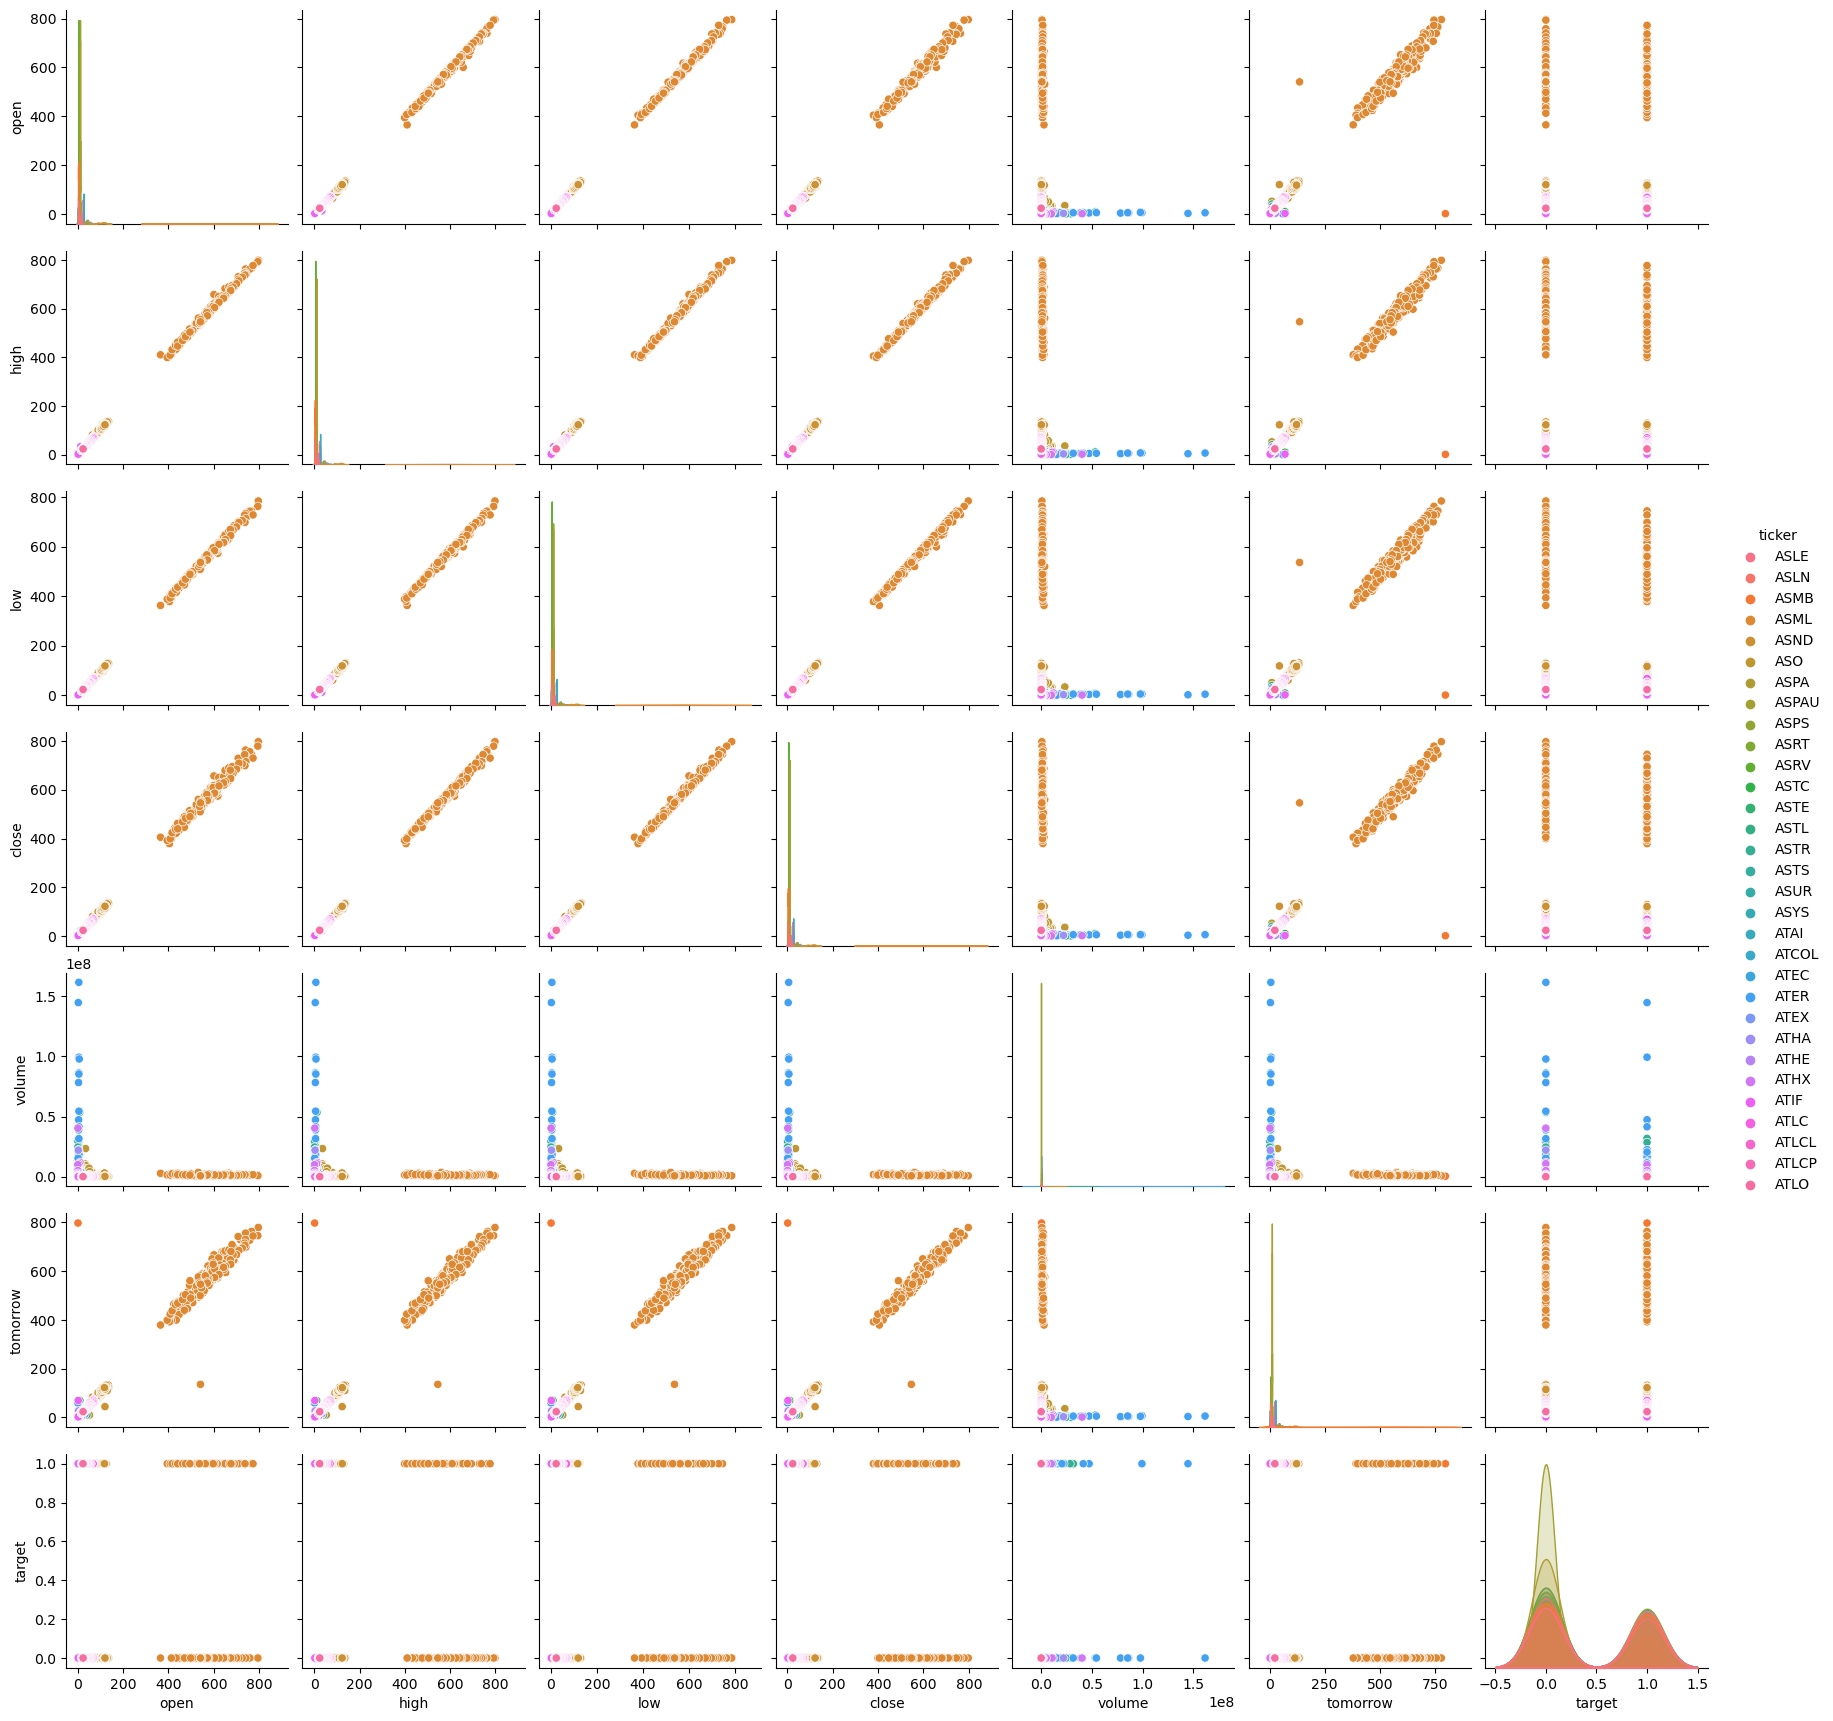

In [19]:
sns.pairplot(data_new,hue = 'ticker')
plt.show()

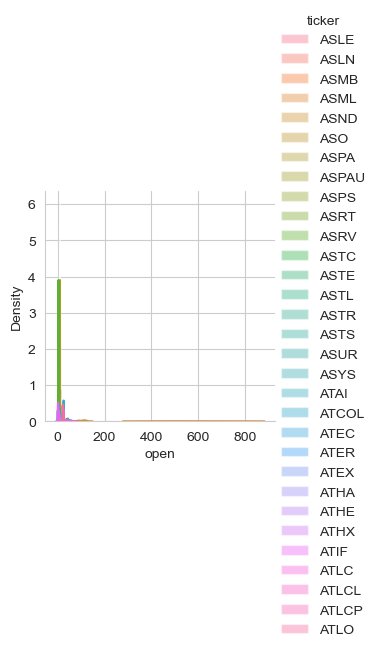

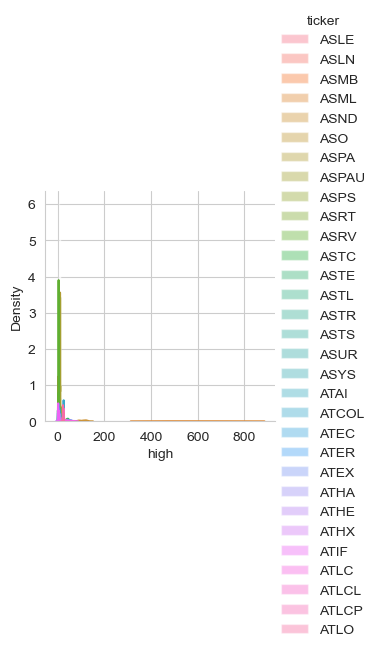

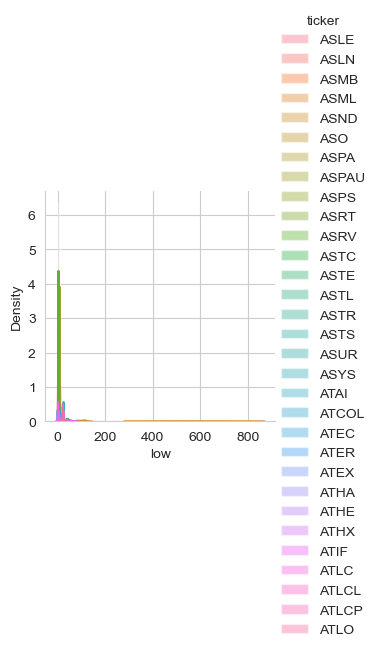

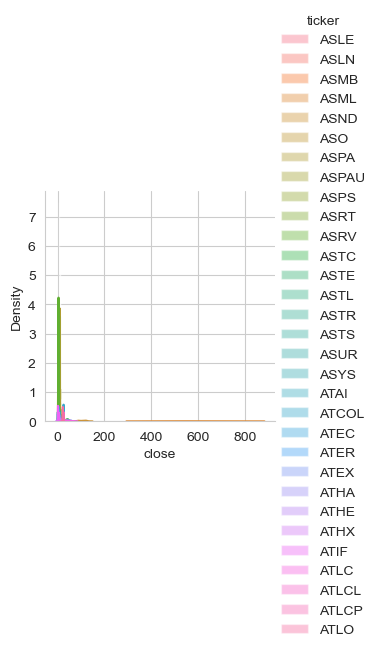

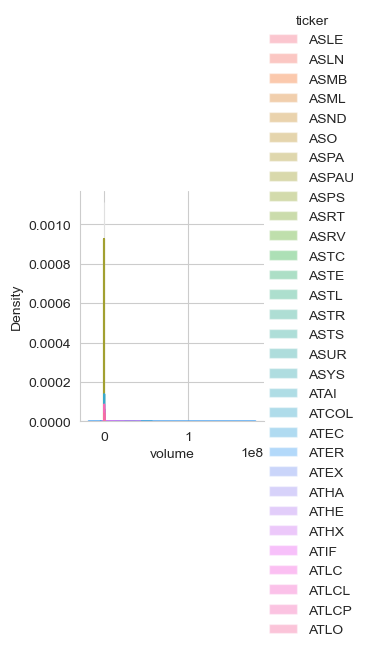

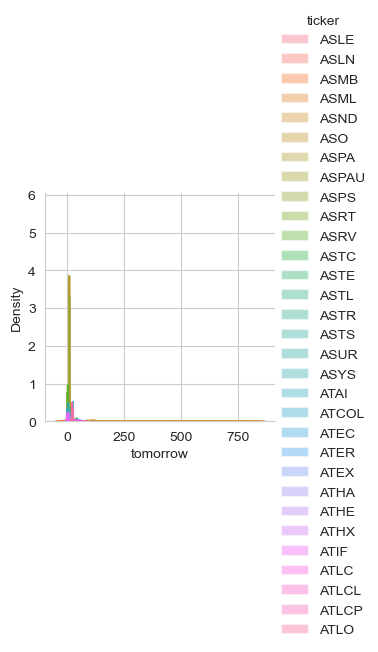

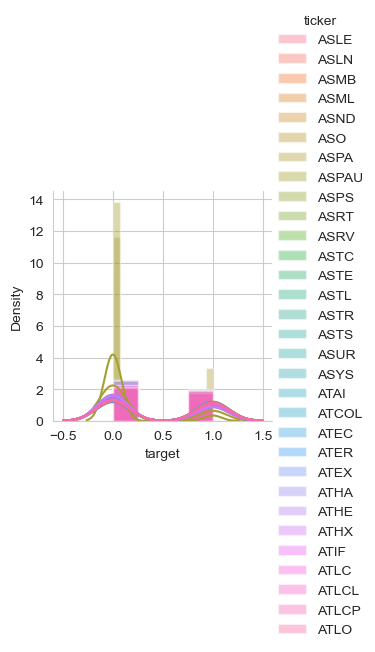

In [20]:
for i in data_new.columns:
    if i=='ticker':
        continue
    sns.set_style('whitegrid')
    sns.FacetGrid(data_new,hue='ticker')\
    .map(sns.distplot,i)\
    .add_legend()
    plt.show()

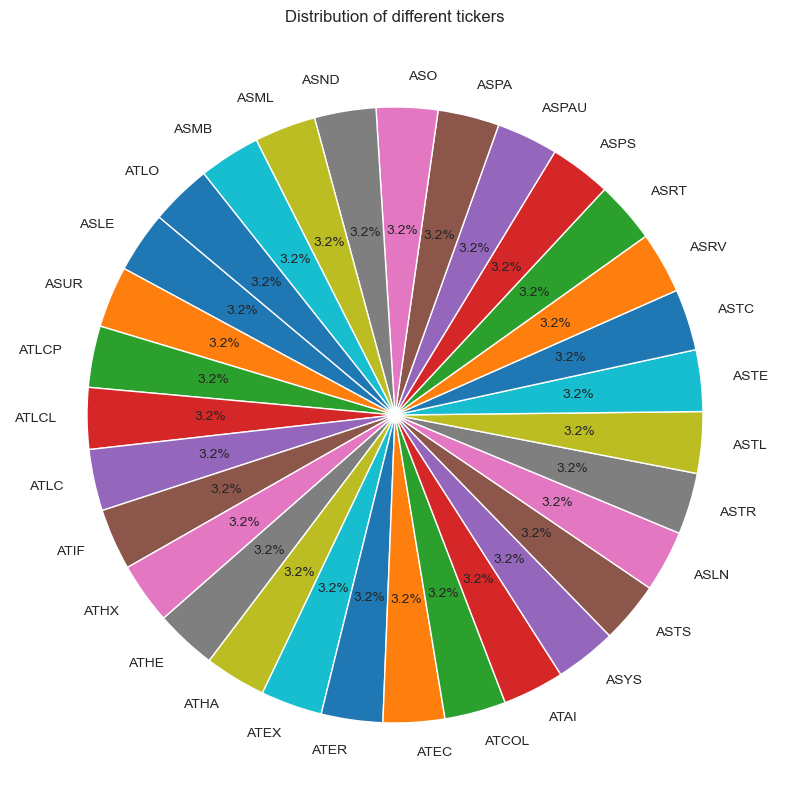

In [21]:
# Plot a pie chart
plt.figure(figsize=(10,10))
plt.pie(data_new['ticker'].value_counts(),labels=data_new['ticker'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of different tickers')
plt.show()

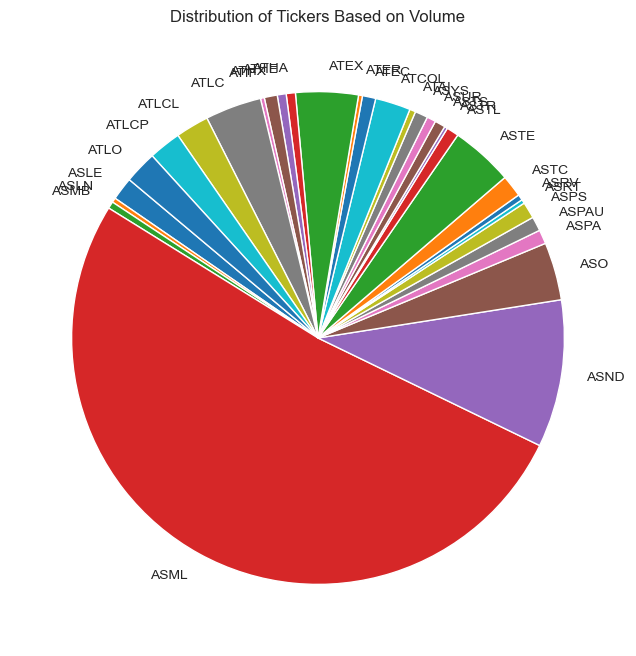

In [22]:
# Group by 'ticker' and calculate the sum of 'volume' for each ticker
ticker_volume_sum = data_new.groupby('ticker')['tomorrow'].sum()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(ticker_volume_sum, labels=ticker_volume_sum.index, startangle=140)
plt.title('Distribution of Tickers Based on Volume')
plt.show()

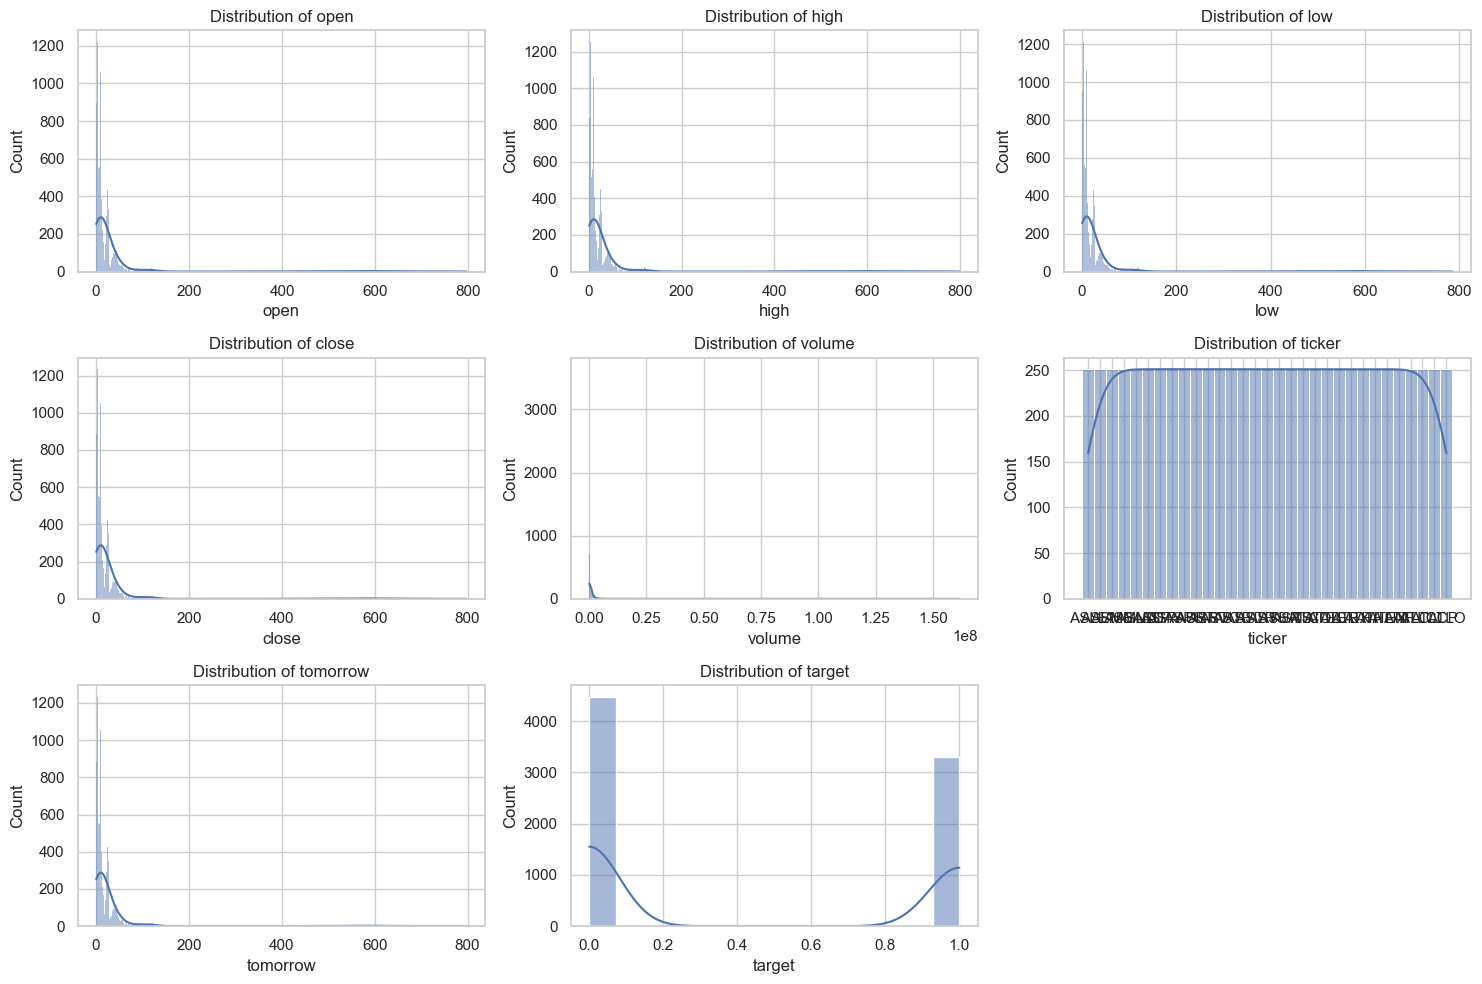

In [23]:
# Set the style for the plot
sns.set(style="whitegrid")

# Create a bar plot for each column
plt.figure(figsize=(15, 10))
for i, column in enumerate(data_new.columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data_new[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'target'}, xlabel='target', ylabel='count'>

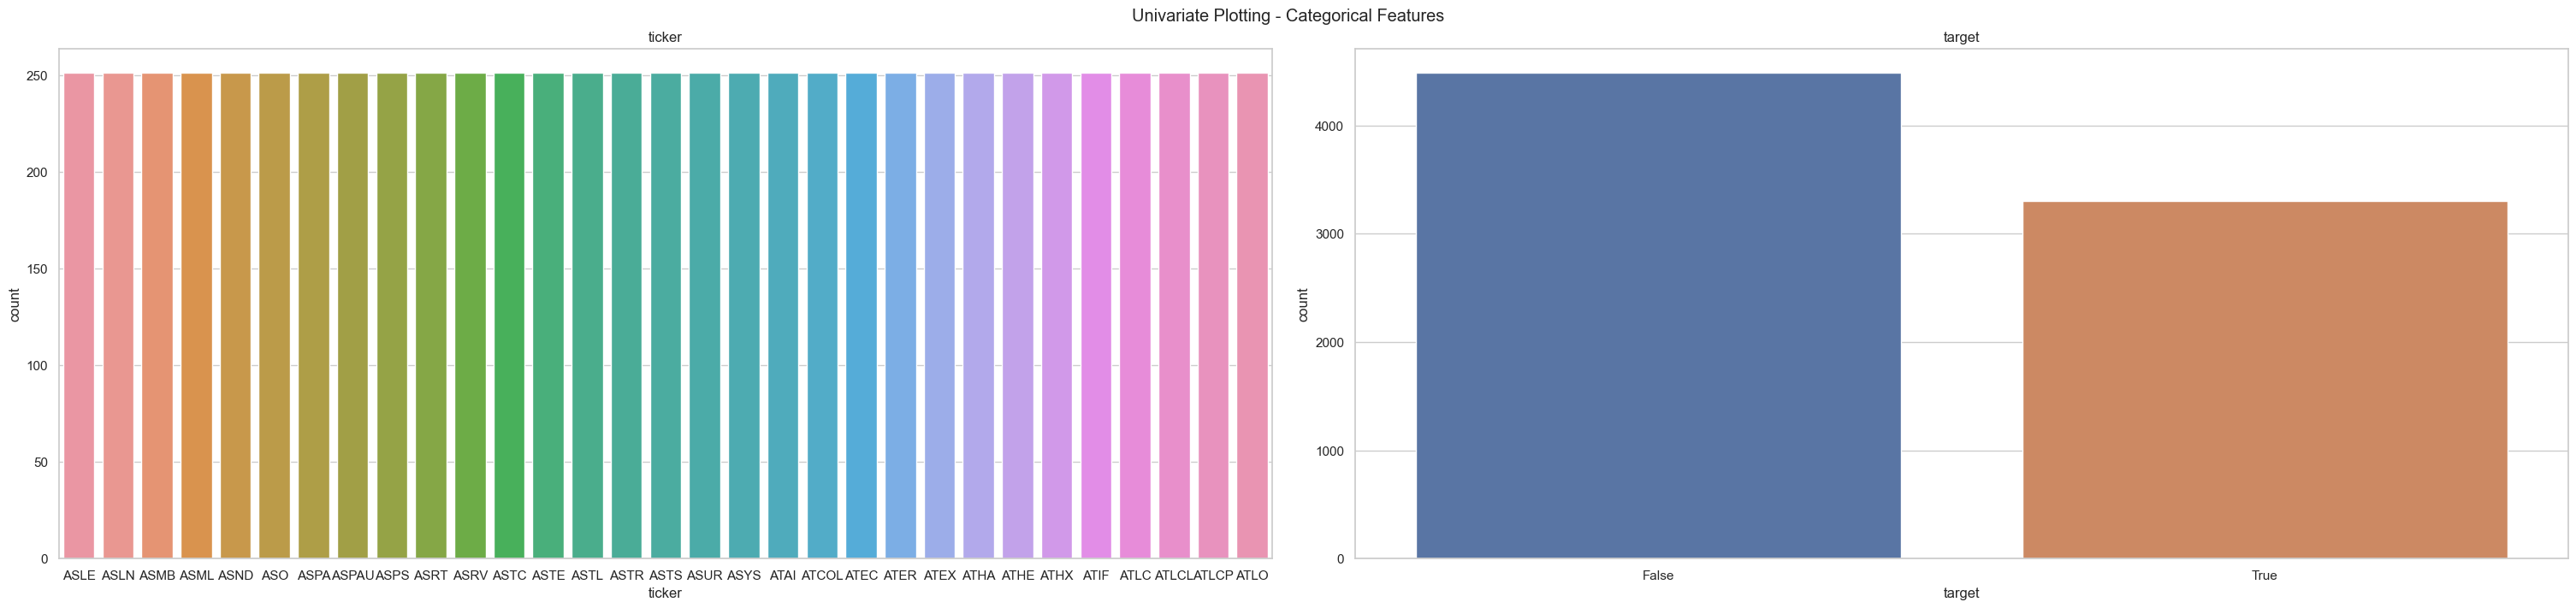

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(30, 7), constrained_layout=True)
fig.suptitle("Univariate Plotting - Categorical Features")

axs[0].set_title("ticker")
sns.countplot(data=data_new, x='ticker', ax=axs[0])

axs[1].set_title("target")
sns.countplot(data=data_new, x='target', ax=axs[1])

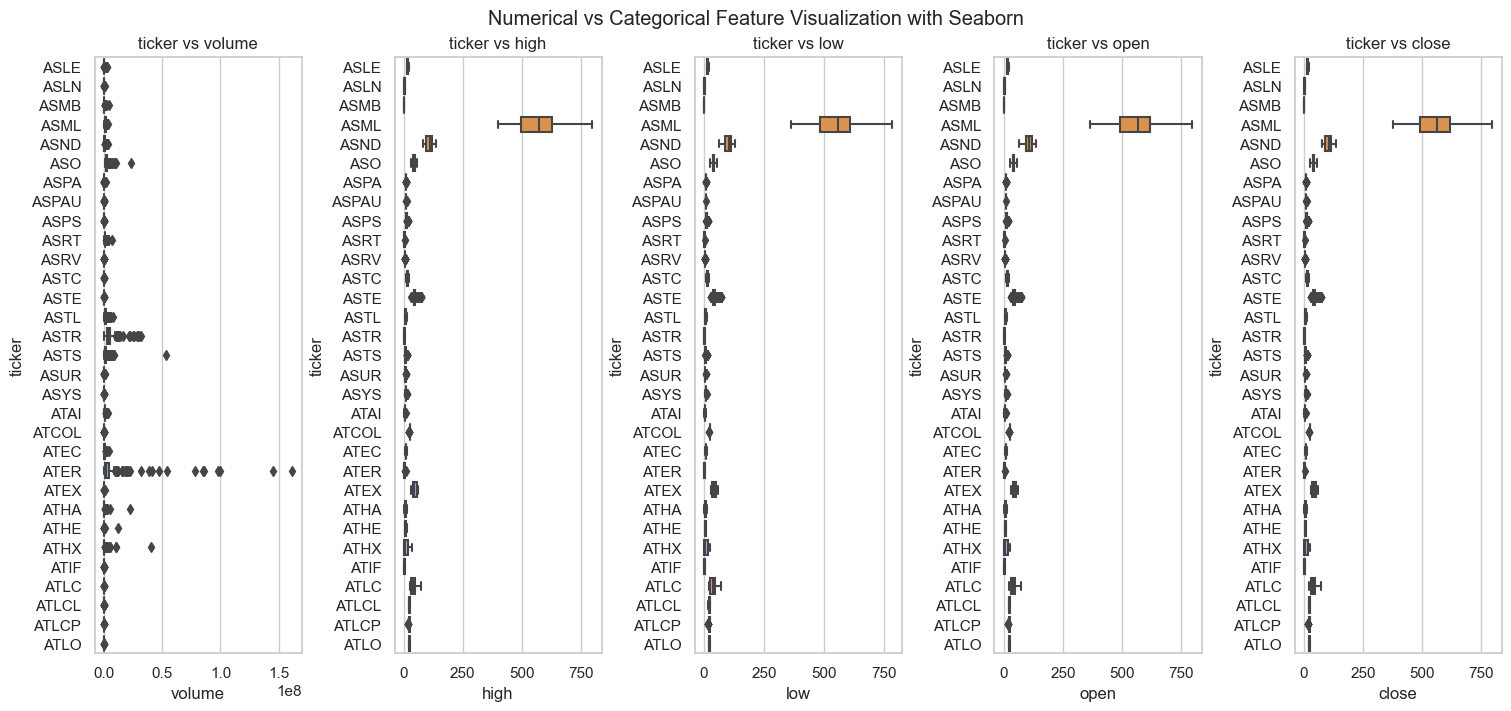

In [25]:
fig, axs = plt.subplots(1, 5, figsize=(15, 7), constrained_layout=True)
fig.suptitle("Numerical vs Categorical Feature Visualization with Seaborn")

axs[0].set_title("ticker vs volume")
sns.boxplot(data=data_new, x='volume', y='ticker', ax=axs[0])

axs[1].set_title("ticker vs high")
sns.boxplot(data=data_new, x='high', y='ticker', ax=axs[1])

axs[2].set_title("ticker vs low")
sns.boxplot(data=data_new, x='low', y='ticker', ax=axs[2])

axs[3].set_title("ticker vs open")
sns.boxplot(data = data_new, x = 'open', y = 'ticker', ax=axs[3])

axs[4].set_title("ticker vs close")
sns.boxplot(data = data_new, x = 'close', y = 'ticker', ax=axs[4])

plt.show()

<Axes: xlabel='tomorrow', ylabel='Count'>

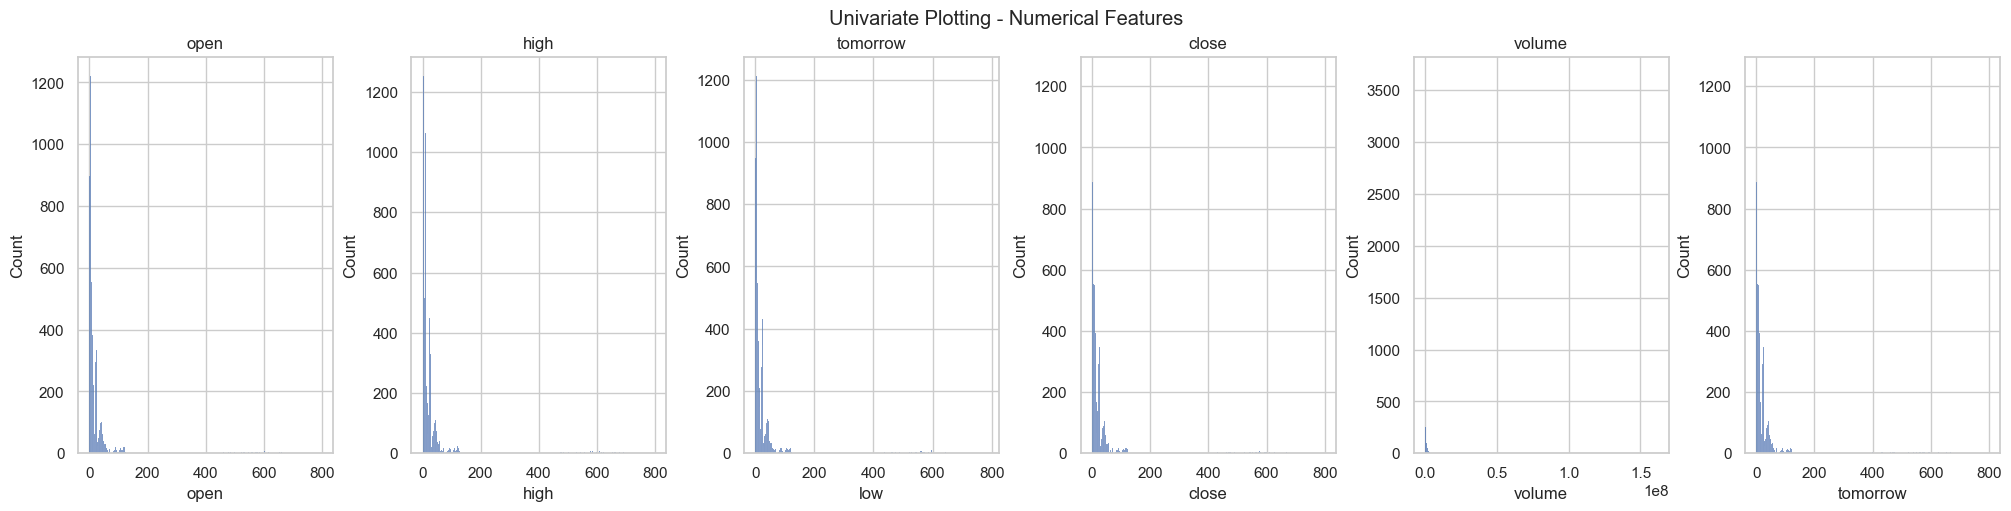

In [26]:
fig, axs = plt.subplots(1, 6, figsize=(20, 5), constrained_layout=True)
fig.suptitle("Univariate Plotting - Numerical Features")

axs[0].set_title("open")
sns.histplot(data=data_new, x='open', ax=axs[0])

axs[1].set_title("high")
sns.histplot(data=data_new, x='high', ax=axs[1])

axs[2].set_title("low")
sns.histplot(data=data_new, x='low', ax=axs[2])

axs[3].set_title("close")
sns.histplot(data=data_new, x='close', ax=axs[3])

axs[4].set_title("volume")
sns.histplot(data=data_new, x='volume', ax=axs[4])

axs[2].set_title("tomorrow")
sns.histplot(data=data_new, x='tomorrow', ax=axs[5])

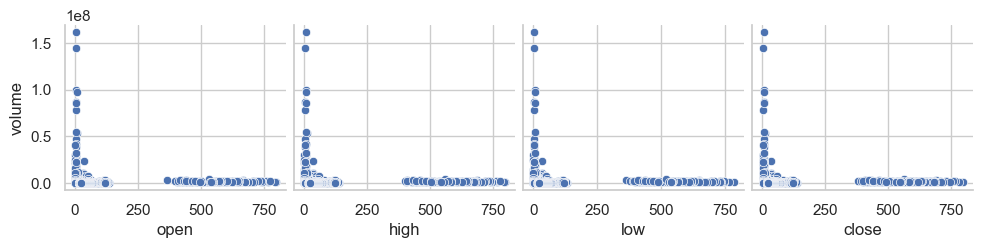

In [27]:
sns.pairplot(data=data_new,
           x_vars=['open', 'high', 'low', 'close'],
           y_vars='volume')

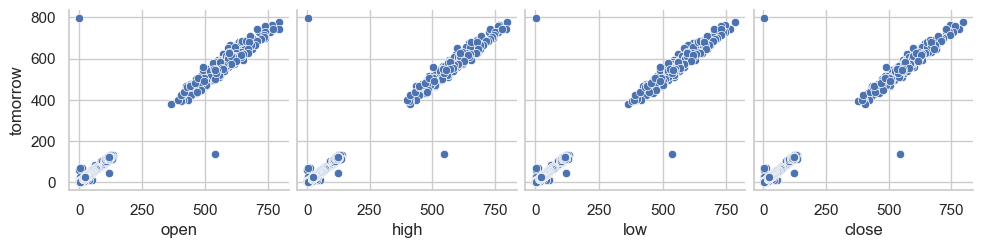

In [28]:
sns.pairplot(data=data_new,
           x_vars=['open', 'high', 'low', 'close'],
           y_vars='tomorrow')

In [29]:
y = data_new.pop("tomorrow")
X = data_new

In [30]:
# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5835, 7) (5835,)
(1946, 7) (1946,)


In [31]:
X_train.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
ticker     object
target     object
dtype: object

In [32]:
# Separating Categorical and Numerical Columns

X_train_cat = X_train.select_dtypes(include=['object'])
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])


In [33]:
X_train_cat.head()

,ticker,target
4053,ASUR,False
2975,ASTC,False
3907,ASTS,False
3932,ASTS,False
6283,ATHX,True


In [34]:
X_train_num.head()

,open,high,low,close,volume
4053,7.00,7.21,6.95,6.98,22100.0
2975,13.50,13.50,12.60,13.20,2403.0
3907,6.38,7.20,6.30,7.14,1386400.0
3932,12.00,12.09,10.85,11.43,2250600.0
6283,20.75,21.00,20.25,20.50,44032.0


In [35]:
# Rescaling numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = scaler.get_feature_names_out(), 
                                    index = X_train_num.index)

X_train_num_transformed.head()

,open,high,low,close,volume
4053,-0.283390,-0.283433,-0.281923,-0.283438,-0.194292
2975,-0.219116,-0.222235,-0.225050,-0.221929,-0.199560
3907,-0.289521,-0.283530,-0.288466,-0.281856,0.170636
3932,-0.233948,-0.235953,-0.242666,-0.239432,0.401796
6283,-0.147425,-0.149264,-0.148045,-0.149739,-0.188425


In [36]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Feature Names:", scaler.get_feature_names_out())
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 5
Feature Names: ['open' 'high' 'low' 'close' 'volume']
Mean of each column: [3.56589361e+01 3.63415023e+01 3.49574735e+01 3.56419021e+01
 7.48468327e+05]
Std of each column: [1.01128949e+02 1.02780884e+02 9.93444274e+01 1.01122136e+02
 3.73854305e+06]


In [37]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (5835, 2)
Shape of Data after Transformation: (5835, 33)


,ticker_ASLE,ticker_ASLN,ticker_ASMB,ticker_ASML,ticker_ASND,ticker_ASO,ticker_ASPA,ticker_ASPAU,ticker_ASPS,ticker_ASRT,...,ticker_ATHA,ticker_ATHE,ticker_ATHX,ticker_ATIF,ticker_ATLC,ticker_ATLCL,ticker_ATLCP,ticker_ATLO,target_False,target_True
4053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [38]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['ticker' 'target']
Unique Categories: [array(['ASLE', 'ASLN', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPA', 'ASPAU',
       'ASPS', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTL', 'ASTR', 'ASTS',
       'ASUR', 'ASYS', 'ATAI', 'ATCOL', 'ATEC', 'ATER', 'ATEX', 'ATHA',
       'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO'],
      dtype=object), array([False, True], dtype=object)]
Feature Names after encoding: ['ticker_ASLE' 'ticker_ASLN' 'ticker_ASMB' 'ticker_ASML' 'ticker_ASND'
 'ticker_ASO' 'ticker_ASPA' 'ticker_ASPAU' 'ticker_ASPS' 'ticker_ASRT'
 'ticker_ASRV' 'ticker_ASTC' 'ticker_ASTE' 'ticker_ASTL' 'ticker_ASTR'
 'ticker_ASTS' 'ticker_ASUR' 'ticker_ASYS' 'ticker_ATAI' 'ticker_ATCOL'
 'ticker_ATEC' 'ticker_ATER' 'ticker_ATEX' 'ticker_ATHA' 'ticker_ATHE'
 'ticker_ATHX' 'ticker_ATIF' 'ticker_ATLC' 'ticker_ATLCL' 'ticker_ATLCP'
 'ticker_ATLO' 'target_False' 'target_True']


In [39]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (5835, 2)
Shape of Data after Transformation: (5835, 31)


,ticker_ASLN,ticker_ASMB,ticker_ASML,ticker_ASND,ticker_ASO,ticker_ASPA,ticker_ASPAU,ticker_ASPS,ticker_ASRT,ticker_ASRV,...,ticker_ATEX,ticker_ATHA,ticker_ATHE,ticker_ATHX,ticker_ATIF,ticker_ATLC,ticker_ATLCL,ticker_ATLCP,ticker_ATLO,target_True
4053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [40]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['ticker' 'target']
Unique Categories: [array(['ASLE', 'ASLN', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPA', 'ASPAU',
       'ASPS', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTL', 'ASTR', 'ASTS',
       'ASUR', 'ASYS', 'ATAI', 'ATCOL', 'ATEC', 'ATER', 'ATEX', 'ATHA',
       'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO'],
      dtype=object), array([False, True], dtype=object)]
Feature Names after encoding: ['ticker_ASLN' 'ticker_ASMB' 'ticker_ASML' 'ticker_ASND' 'ticker_ASO'
 'ticker_ASPA' 'ticker_ASPAU' 'ticker_ASPS' 'ticker_ASRT' 'ticker_ASRV'
 'ticker_ASTC' 'ticker_ASTE' 'ticker_ASTL' 'ticker_ASTR' 'ticker_ASTS'
 'ticker_ASUR' 'ticker_ASYS' 'ticker_ATAI' 'ticker_ATCOL' 'ticker_ATEC'
 'ticker_ATER' 'ticker_ATEX' 'ticker_ATHA' 'ticker_ATHE' 'ticker_ATHX'
 'ticker_ATIF' 'ticker_ATLC' 'ticker_ATLCL' 'ticker_ATLCP' 'ticker_ATLO'
 'target_True']


In [41]:
# OneHotEncoding the categorical features
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', min_frequency=190, sparse_output=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)
X_train_cat_tansformed = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(), 
                               index = X_train_cat.index)

print("Shape of Data before Transformation:", X_train_cat.shape)
print("Shape of Data after Transformation:", X_train_cat_tansformed.shape)

X_train_cat_tansformed.head()

Shape of Data before Transformation: (5835, 2)
Shape of Data after Transformation: (5835, 15)


,ticker_ASML,ticker_ASND,ticker_ASO,ticker_ASRT,ticker_ASTC,ticker_ASTE,ticker_ASTS,ticker_ASUR,ticker_ATAI,ticker_ATCOL,ticker_ATER,ticker_ATLC,ticker_ATLO,ticker_infrequent_sklearn,target_True
4053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2975,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3907,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3932,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [42]:
print("Applied encoding on:", encoder_.feature_names_in_)
print("Unique Categories:", encoder_.categories_)
print("Infrequent Categories", encoder_.infrequent_categories_)
print("Feature Names after encoding:", encoder_.get_feature_names_out())

Applied encoding on: ['ticker' 'target']
Unique Categories: [array(['ASLE', 'ASLN', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPA', 'ASPAU',
       'ASPS', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTL', 'ASTR', 'ASTS',
       'ASUR', 'ASYS', 'ATAI', 'ATCOL', 'ATEC', 'ATER', 'ATEX', 'ATHA',
       'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO'],
      dtype=object), array([False, True], dtype=object)]
Infrequent Categories [array(['ASLE', 'ASLN', 'ASPA', 'ASPAU', 'ASPS', 'ASRV', 'ASTL', 'ASTR',
       'ASYS', 'ATEC', 'ATEX', 'ATHA', 'ATHE', 'ATHX', 'ATIF', 'ATLCL',
       'ATLCP'], dtype=object), None]
Feature Names after encoding: ['ticker_ASML' 'ticker_ASND' 'ticker_ASO' 'ticker_ASRT' 'ticker_ASTC'
 'ticker_ASTE' 'ticker_ASTS' 'ticker_ASUR' 'ticker_ATAI' 'ticker_ATCOL'
 'ticker_ATER' 'ticker_ATLC' 'ticker_ATLO' 'ticker_infrequent_sklearn'
 'target_True']


In [43]:
X_train_cat_transformed = pd.DataFrame(index=X_train_cat.index)

X_train_cat_transformed.head()

""
4053
2975
3907
3932
6283


In [44]:
ticker_encoder = {'ASLE' : 1, 'ASLN' : 2, 'ASMB' : 3, 'ASML' : 4, 'ASND' : 5, 'ASO' : 6, 'ASPA' : 7, 'ASPAU' : 8,
       'ASPS' : 9, 'ASRT' : 10, 'ASRV' : 11, 'ASTC' : 12, 'ASTE' : 13, 'ASTL' : 14, 'ASTR' : 15, 'ASTS' : 16,
       'ASUR' : 17, 'ASYS' : 18, 'ATAI' : 19, 'ATCOL' : 20, 'ATEC' : 21, 'ATER' : 22, 'ATEX' : 23, 'ATHA' : 24,
       'ATHE' : 25, 'ATHX' : 26, 'ATIF' : 27, 'ATLC' : 28, 'ATLCL' : 29, 'ATLCP' : 30, 'ATLO' : 31}
target_encoder = {True : 1, False : 0}

# Apply Label Encoding
X_train_cat_transformed['ticker'] = X_train_cat['ticker'].map(ticker_encoder)
X_train_cat_transformed['target'] = X_train_cat['target'].map(target_encoder)

X_train_cat_transformed.head()

,ticker,target
4053,17,0
2975,12,0
3907,16,0
3932,16,0
6283,26,1


In [45]:
X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,open,high,low,close,volume,ticker,target
4053,-0.283390,-0.283433,-0.281923,-0.283438,-0.194292,17,0
2975,-0.219116,-0.222235,-0.225050,-0.221929,-0.199560,12,0
3907,-0.289521,-0.283530,-0.288466,-0.281856,0.170636,16,0
3932,-0.233948,-0.235953,-0.242666,-0.239432,0.401796,16,0
6283,-0.147425,-0.149264,-0.148045,-0.149739,-0.188425,26,1


In [46]:
# Separate Categorical and Numerical Features

X_test_cat = X_test.select_dtypes(include=['object'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

In [47]:
# Apply transformation on Numerical data

X_test_num_transformed = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = scaler.get_feature_names_out(), 
                                   index = X_test_num.index)

X_test_num_transformed.head()

,open,high,low,close,volume
2476,-0.324723,-0.324686,-0.323596,-0.323192,0.109811
5176,-0.260845,-0.262904,-0.262697,-0.264155,-0.072640
6346,-0.219116,-0.217370,-0.223540,-0.221434,-0.161218
7272,-0.144903,-0.147707,-0.142308,-0.146574,-0.199641
3554,-0.318988,-0.319724,-0.319117,-0.318940,0.430363


In [48]:
# Apply transformation on Categorical data

X_test_cat_transformed = pd.DataFrame(index = X_test_cat.index)

X_test_cat_transformed['ticker'] = X_test_cat['ticker'].map(ticker_encoder)
X_test_cat_transformed['target'] = X_test_cat['target'].map(target_encoder)

X_test_cat_transformed.head()

,ticker,target
2476,10,0
5176,21,0
6346,26,0
7272,29,0
3554,15,0


In [49]:
# Concatinate X_test_num_transformed and X_test_cat_transformed

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,open,high,low,close,volume,ticker,target
2476,-0.324723,-0.324686,-0.323596,-0.323192,0.109811,10,0
5176,-0.260845,-0.262904,-0.262697,-0.264155,-0.072640,21,0
6346,-0.219116,-0.217370,-0.223540,-0.221434,-0.161218,26,0
7272,-0.144903,-0.147707,-0.142308,-0.146574,-0.199641,29,0
3554,-0.318988,-0.319724,-0.319117,-0.318940,0.430363,15,0


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

1.4809870400435847

In [51]:
output_df = pd.DataFrame({'Actual': y_test})

In [52]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
2476,2.83,2.372326
5176,8.75,8.014936
6346,12.75,12.305098
7272,20.50,19.628601
3554,3.28,2.634066
...,...,...
4214,5.26,6.538824
3640,1.39,2.848601
5080,11.50,12.925619
6648,1.90,0.814131


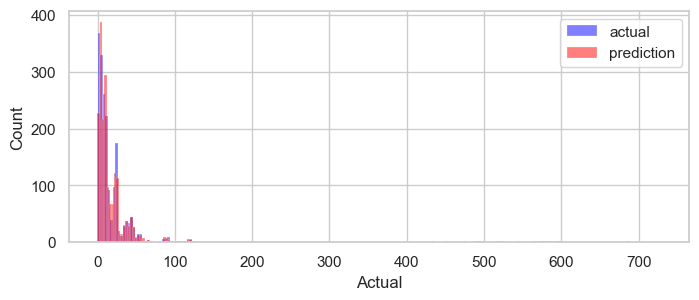

In [53]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['Linear Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

1.0974612752433182

In [55]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
2476,2.83,2.372326,3.0000
5176,8.75,8.014936,9.0640
6346,12.75,12.305098,13.0500
7272,20.50,19.628601,20.6188
3554,3.28,2.634066,2.3660
...,...,...,...
4214,5.26,6.538824,5.2720
3640,1.39,2.848601,2.4264
5080,11.50,12.925619,11.3360
6648,1.90,0.814131,1.8352


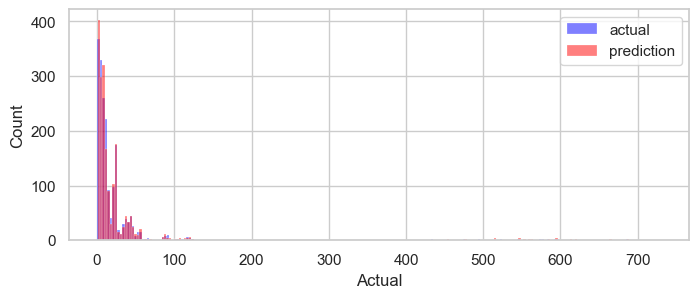

In [56]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['KNN Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [57]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

1.6758000052704132

In [58]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
2476,2.83,2.372326,3.0000,2.930000
5176,8.75,8.014936,9.0640,8.820000
6346,12.75,12.305098,13.0500,12.250000
7272,20.50,19.628601,20.6188,19.450001
3554,3.28,2.634066,2.3660,3.310000
...,...,...,...,...
4214,5.26,6.538824,5.2720,5.210000
3640,1.39,2.848601,2.4264,1.360000
5080,11.50,12.925619,11.3360,12.100000
6648,1.90,0.814131,1.8352,1.900000


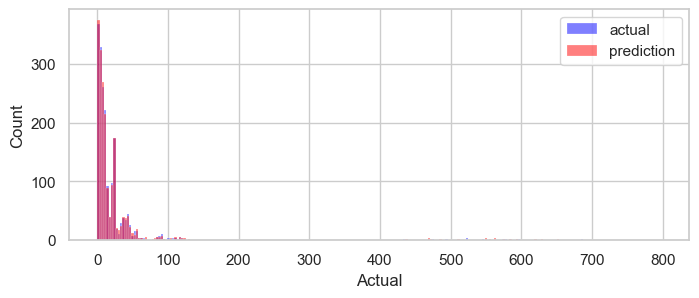

In [59]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['DT Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [60]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

y_test_pred = regressor.predict(X_test_transformed)

metrics.mean_absolute_error(y_test, y_test_pred)

1.146678571007154

In [61]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
2476,2.83,2.372326,3.0000,2.930000,2.80640
5176,8.75,8.014936,9.0640,8.820000,8.63030
6346,12.75,12.305098,13.0500,12.250000,14.32260
7272,20.50,19.628601,20.6188,19.450001,20.20414
3554,3.28,2.634066,2.3660,3.310000,3.26595
...,...,...,...,...,...
4214,5.26,6.538824,5.2720,5.210000,5.20350
3640,1.39,2.848601,2.4264,1.360000,1.40778
5080,11.50,12.925619,11.3360,12.100000,11.85750
6648,1.90,0.814131,1.8352,1.900000,1.87930


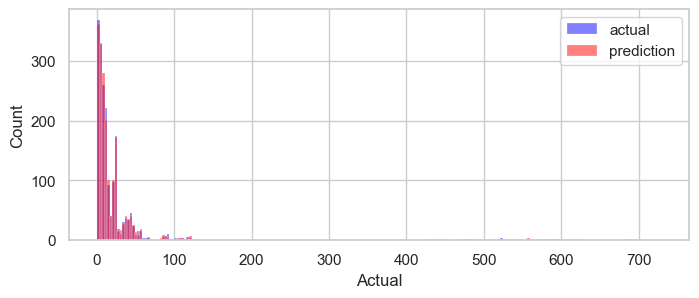

In [62]:
fig, ax = plt.subplots(figsize=(8,3))

sns.histplot(output_df['Actual'], color='blue', alpha=0.5, label="actual")
sns.histplot(output_df['RF Regression Predictions'], color='red', alpha=0.5, label="prediction")

plt.legend()

In [63]:
df_melted = pd.melt(output_df,  var_name='Model', value_name='Prediction')

df_melted.head()

,Model,Prediction
0,Actual,2.83
1,Actual,8.75
2,Actual,12.75
3,Actual,20.50
4,Actual,3.28


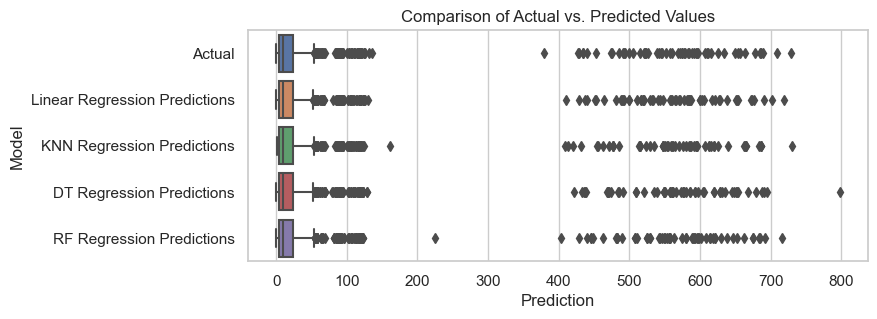

In [64]:
fig, ax = plt.subplots(figsize=(8,3))

sns.boxplot(x='Prediction', y='Model', data=df_melted)
plt.title('Comparison of Actual vs. Predicted Values')

plt.show()